# 0.) Import and Clean data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
names = df[['country']].copy()
X = df.drop('country', axis = 1)

In [6]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [7]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [8]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

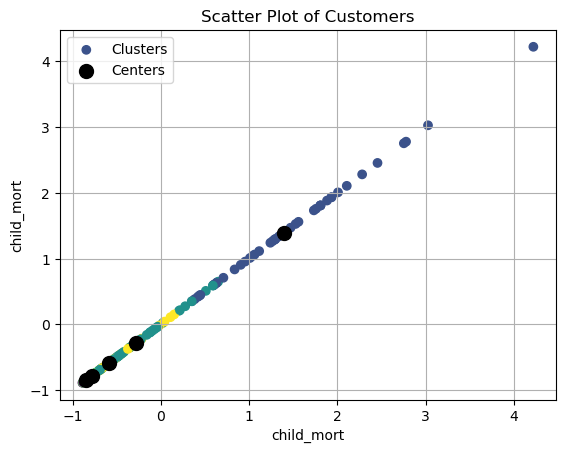

In [9]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 0


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [16]:
WCSSs = []
Ks = range(1,5)
for k in Ks:
        kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
        WCSSs.append(kmeans.inertia_)

In [17]:
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

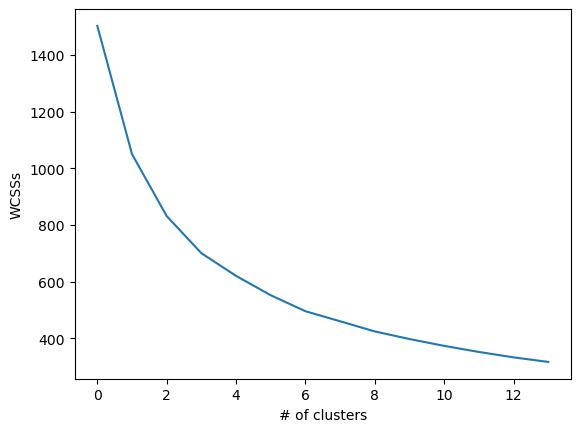

In [18]:
plt.plot(WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSSs")
plt.show()

# 6.) Do the same for a silhoutte plot

In [19]:
from sklearn.metrics import silhouette_score

In [24]:
SSs = []
Ks = range(2,15)
for k in Ks:
        kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
        sil = silhouette_score(X_scaled,kmeans.labels_)
        SSs.append(sil)

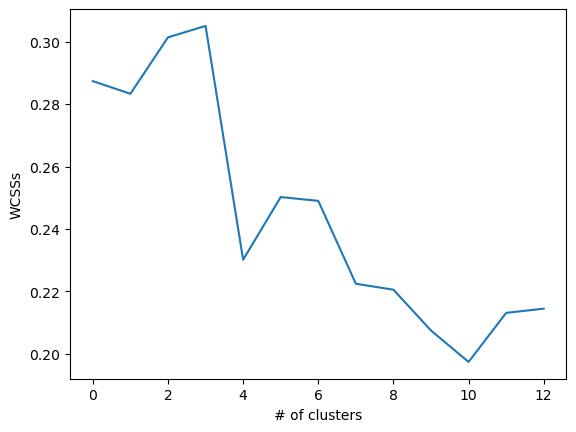

In [26]:
plt.plot(SSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSSs")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [27]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

In [29]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int32)

In [30]:
preds = pd.DataFrame(kmeans.labels_)

In [31]:
output = pd.concat([preds,df], axis = 1)

In [32]:
output

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,1,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...,...
162,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,1,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,1,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,0,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [33]:
print("Cluster 1: ")
list(output.loc[output[0] == 0, "country"])

Cluster 1: 


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [35]:
print("Cluster 2: ")
list(output.loc[output[0] == 1, "country"])

Cluster 2: 


['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Canada',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Hungary',
 'Iceland',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Moldova',
 'Montenegro',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Sey

In [ ]:
#### Write an observation

### Cluster 1:
This cluster mainly includes countries that are potentially less economically developed, as suggested by the presence of countries like Afghanistan, Angola, Bangladesh, and others in the list. These countries might be characterized by higher child mortality rates, lower income levels, and possibly higher inflation rates, indicative of developing or underdeveloped economies.

### Cluster 2:
This cluster likely represents more economically developed or developing countries with better health outcomes, higher income levels, and lower child mortality rates. This cluster includes countries like Albania, Algeria, Antigua and Barbuda, Argentina, and others, suggesting a more stable economic condition compared to countries in Cluster 1.

### Interesting Observations:
- **Economic Development**: The clustering seems to reflect varying levels of economic development and possibly other socio-economic indicators like health, education, and infrastructure.
- **Geographical Diversity**: Both clusters include countries from various parts of the world, indicating that the clustering is based more on economic and social indicators rather than geographical location.
- **Potential for Targeted Policies**: The clustering can provide a basis for targeted economic policies, development aid, and other forms of international support, focusing on the specific needs and characteristics of countries in each cluster.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [39]:
Q8DF = pd.concat([preds, X], axis = 1)

In [40]:
Q8DF.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [41]:
Q8DF.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

1. **Child Mortality (child_mort):**
   - Cluster 0 has a significantly higher mean child mortality rate (76.28) compared to Cluster 1 (12.16). This suggests that countries in Cluster 0 are likely to have less access to healthcare services, nutrition, and living conditions conducive to child survival compared to those in Cluster 1.

2. **Exports, Imports, and GDP per capita (exports, imports, gdpp):**
   - The mean values for exports (30.20 for Cluster 0 and 48.60 for Cluster 1) and imports (43.64 for Cluster 0 and 49.12 for Cluster 1) indicate that countries in Cluster 1 are more integrated into the global economy, engaging more in international trade.
   - The GDP per capita (gdpp) significantly differs between the clusters, with Cluster 1 countries having a much higher mean GDP per capita compared to Cluster 0, reflecting higher economic prosperity and development levels in Cluster 1 countries.

3. **Health Expenditure (health):**
   - The average health expenditure as a percentage of GDP is higher in Cluster 1 (7.31) than in Cluster 0 (6.09), hinting at potentially better healthcare infrastructure and access in Cluster 1 countries.

4. **Income and Inflation (income, inflation):**
   - There is a stark difference in mean income levels, with Cluster 1 countries having an average income, significantly higher than Cluster 0. This aligns with the higher GDP per capita observed in Cluster 1 and points to a higher standard of living.
   - Inflation rates are higher on average in Cluster 0 (11.10%) compared to Cluster 1 (5.50%), which could indicate economic instability or challenges in managing the cost of living in Cluster 0 countries.

5. **Life Expectancy and Total Fertility Rate (life_expec, total_fer):**
   - Life expectancy is higher in Cluster 1 (76.49 years) than in Cluster 0 (61.91 years), suggesting better health outcomes and living conditions in Cluster 1.
   - The total fertility rate is lower in Cluster 1 (1.94) compared to Cluster 0 (4.41), which often correlates with higher education levels, access to family planning, and economic development.

6. **Variability within Clusters:**
   - The standard deviations (std) for most variables are generally higher in Cluster 0 than in Cluster 1, indicating greater variability within Cluster 0 countries. This suggests that while countries in Cluster 0 share some common characteristics, there's a broader range of values for these indicators within the cluster.

These observations reflect the socio-economic and health disparities between the clusters, with Cluster 1 likely representing more developed countries with better health outcomes, higher income levels, and lower child mortality rates, while Cluster 0 includes countries with more significant challenges in these areas.